# part 1


#  Using Important Libraries
### sklearn is a machine learning library that provides easy-to-use tools for classification, regression, and clustering.
### matplotlib is used for plotting and visualizing data.
### numpy is used for numerical operations and creating meshgrids for decision boundaries.


In [445]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

#  Function: create_model_predict(X, y)
### This function trains a (SVM) model with a linear kernel on a dataset (X, y).
### It splits the data into training and testing sets, fits the model, prints the accuracy, and returns the model.


In [446]:
def create_model_predict(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    return model

# Function: plot_data_split_prediction(X, y, model)
### This function visualizes the dataset and the decision boundary of the trained SVM model.
### It creates a meshgrid across the data space and plots the decision boundary based on the model's decision function.


In [447]:
def plot_data_split_prediction(X, y, model, margin=0.5):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Expand limits by margin
    x_range = xlim[1] - xlim[0]
    y_range = ylim[1] - ylim[0]

    ax.set_xlim(xlim[0] - margin * x_range, xlim[1] + margin * x_range)
    ax.set_ylim(ylim[0] - margin * y_range, ylim[1] + margin * y_range)

    # Update limits after expanding
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Predict decision function
    try:
        Z = model.decision_function(xy).reshape(XX.shape)
    except:
        Z = model.predict_proba(xy)[:, 1].reshape(XX.shape) - 0.5

    # Debugging: check Z range
    print("Decision function range:", np.min(Z), np.max(Z))

    # Only draw if the decision boundary (Z=0) is inside the range
    if np.min(Z) < 0 < np.max(Z):
        ax.contour(XX, YY, Z, levels=[0], colors='k', linewidths=2)
    else:
        print("Warning: No decision boundary (level 0) in current plot window.")

    plt.title("SVM Decision Boundary")
    plt.show()


#  Dataset 1: make_blobs
### make_blobs generates some data around the number of centers
### Here, we generate two clusters of 2D points and try to classify them using SVM.

Accuracy: 1.0
Decision function range: -7.663600928856834 7.377257490428616


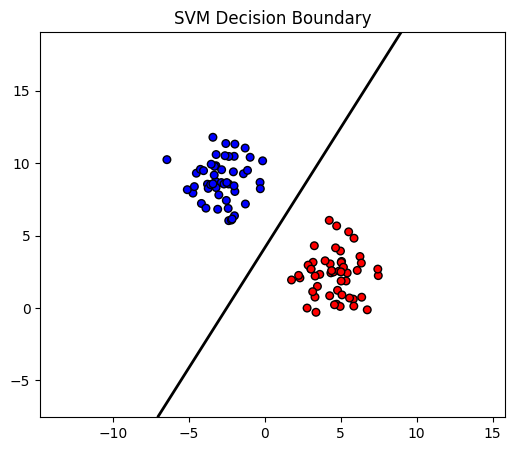

In [448]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)
model=create_model_predict(X,y)
plot_data_split_prediction(X,y,model)



#  Dataset 2: make_circles
### make_circles creates a binary classification problem with concentric circles.
### This dataset is **not linearly separable**, so a linear SVM may perform poorly.


Accuracy: 0.3333333333333333
Decision function range: 0.9992003991586113 1.0006369684256793


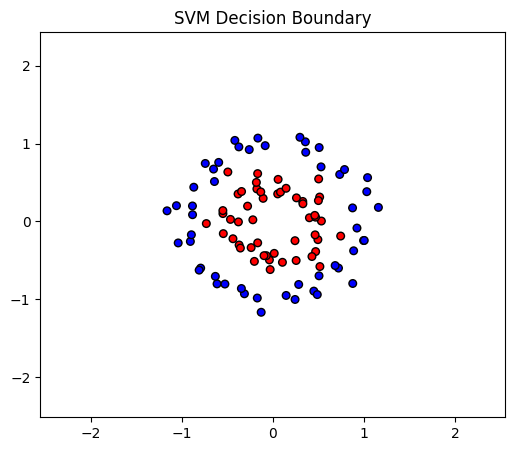

In [449]:
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
model=create_model_predict(X,y)
plot_data_split_prediction(X,y,model)



#  Dataset 3: make_moons
### make_moons generates a two-class dataset in the shape of crescent moons.
### Like `make_circles`, this dataset is also **non-linearly separable**.

Accuracy: 0.8666666666666667
Decision function range: -8.13101943894426 8.30972753691459


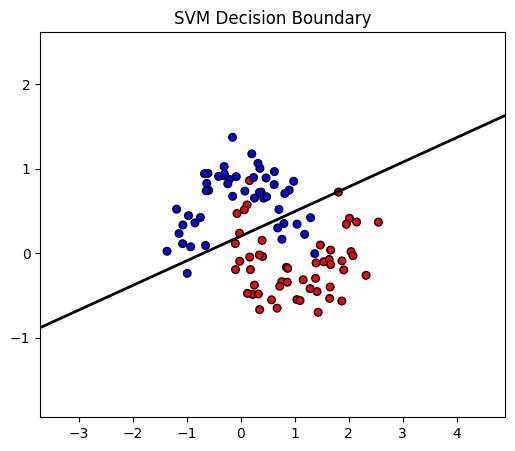

In [450]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)
model=create_model_predict(X,y)
plot_data_split_prediction(X,y,model)


# part 2

##  Train Model with Specific Kernel
This function trains an `SVC` with a given kernel and returns the fitted model after printing its test accuracy.


In [ ]:
def train_model_with_kernel(X,y,kernel):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    if(kernel=='poly'):
        model=SVC(kernel=kernel,degree=3)
    else:

        model=SVC(kernel=kernel)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_pred,y_test)
    print(f"{kernel} model accuracy on Test: {accuracy}")
    return model

#  Experiment 1: IRIS Dataset (First 2 Classes & Features)
Only using:
- Features: sepal length & sepal width (columns 0, 1)
- Classes: Setosa (0) and Versicolor (1)


In [452]:
iris_df=load_iris()
X = iris_df.data
y = iris_df.target

filter=y<2
X_filtred=X[filter,:2]
y_filtred=y[filter]


linear_model=train_model_with_kernel(X_filtred,y_filtred,'linear')
poly_model=train_model_with_kernel(X_filtred,y_filtred,'poly')
rbf_model=train_model_with_kernel(X_filtred,y_filtred,'rbf')

linear model accuracy on Test: 1.0
poly model accuracy on Test: 1.0
rbf model accuracy on Test: 1.0


### 📊 Plot Decision Boundaries (Iris Dataset)


Decision function range: -21.636741437662387 23.23644432496851


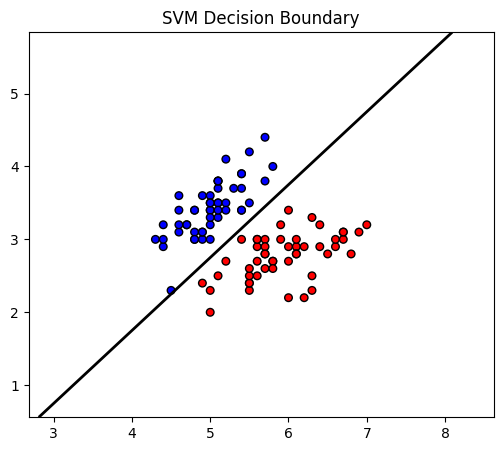

In [453]:
plot_data_split_prediction(X_filtred,y_filtred,linear_model)

Decision function range: -27.19483604585162 62.2006059056277


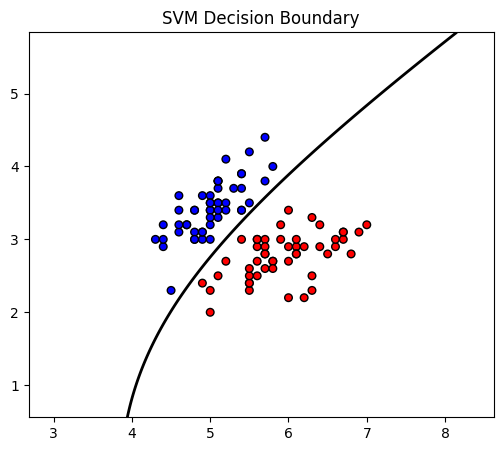

In [454]:
plot_data_split_prediction(X_filtred,y_filtred,poly_model)

Decision function range: -4.9180794529770795 4.420650943286756


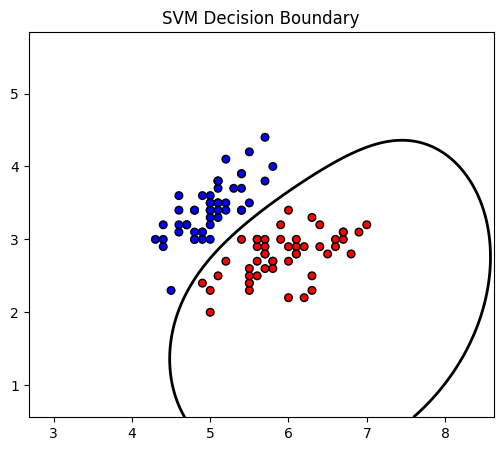

In [455]:
plot_data_split_prediction(X_filtred,y_filtred,rbf_model)

#  Experiment 2: Breast Cancer Dataset (Features 4 & 5 only)
Using:
- Features: mean smoothness & mean compactness


In [456]:
data=load_breast_cancer()
X=data.data[:,4:6]
y=data.target

linear_model=train_model_with_kernel(X,y,'linear')
poly_model=train_model_with_kernel(X,y,'poly')
rbf_model=train_model_with_kernel(X,y,'rbf')

linear model accuracy on Test: 0.7719298245614035
poly model accuracy on Test: 0.8070175438596491
rbf model accuracy on Test: 0.8128654970760234


### 📊 Plot Decision Boundaries (Breast Cancer Dataset)


Decision function range: -7.778537135571495 5.830426208620683


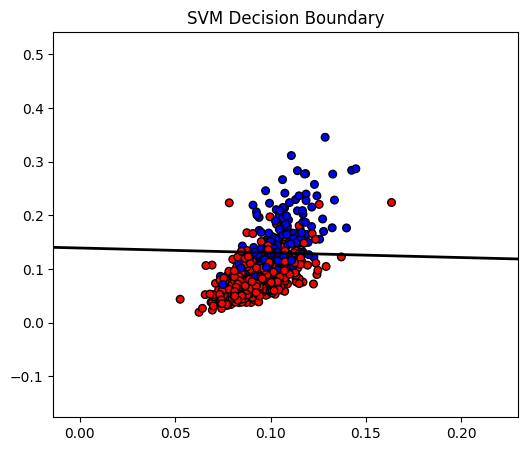

In [457]:
plot_data_split_prediction(X,y,linear_model)

Decision function range: -33.90393555325378 163.23617592458808


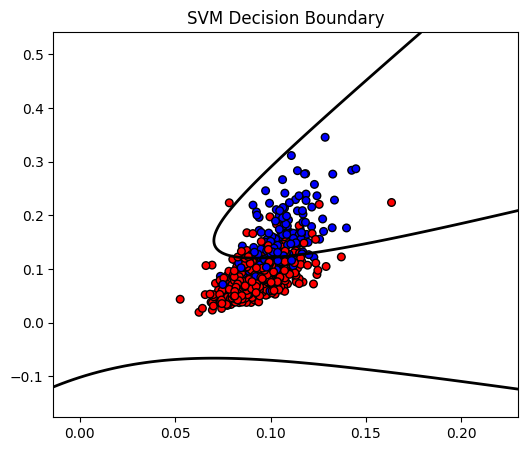

In [458]:
plot_data_split_prediction(X,y,poly_model)

Decision function range: -1.5201482829276194 2.8934169119869972


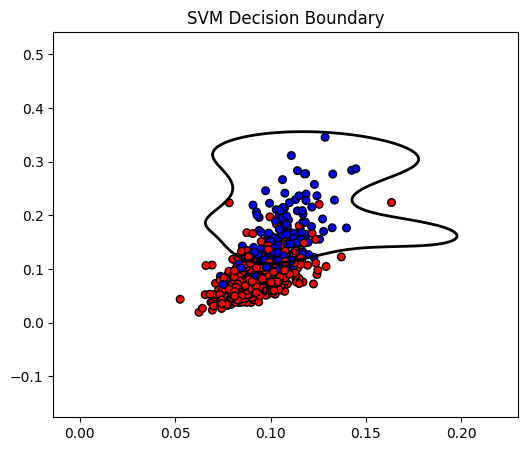

In [459]:
plot_data_split_prediction(X,y,rbf_model)

# part 3

# add noise
### create some noise in shape of our x data

In [460]:
rng=np.random.RandomState(42)
noise=rng.normal(0,1,X.shape)
X_noise=X+(0.02*noise)

# train model

## training model with different kernel with new noisy data

In [461]:
linear_model=train_model_with_kernel(X_noise,y,'linear')
poly_model=train_model_with_kernel(X_noise,y,'poly')
rbf_model=train_model_with_kernel(X_noise,y,'rbf')


linear model accuracy on Test: 0.783625730994152
poly model accuracy on Test: 0.7777777777777778
rbf model accuracy on Test: 0.783625730994152


Decision function range: -7.967481936992735 6.705010534714802


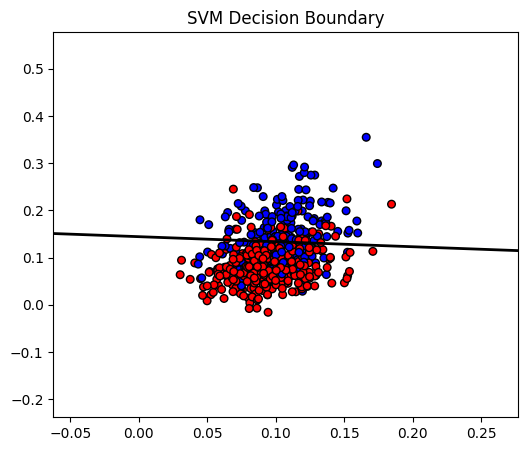

In [462]:
plot_data_split_prediction(X_noise,y,linear_model)

Decision function range: -75.67344022267865 35.139603670083275


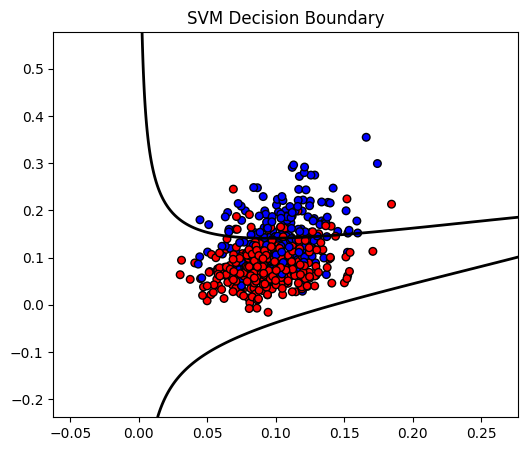

In [463]:
plot_data_split_prediction(X_noise,y,poly_model)

Decision function range: -2.175247112054028 1.6275533346414277


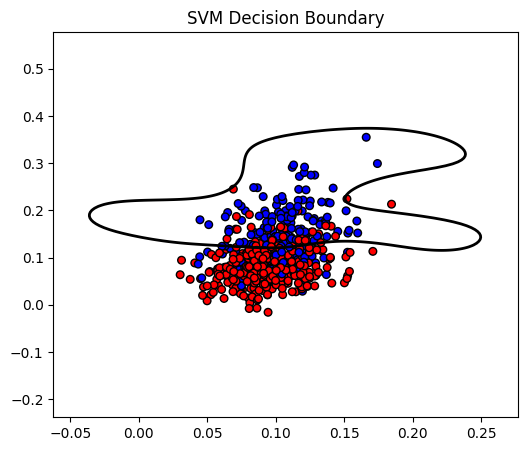

In [464]:
plot_data_split_prediction(X_noise,y,rbf_model)

# part 4

In [465]:
from sklearn.datasets import make_classification


## create a fake dataset with two class with class sep =0.8 witch mean it has overlapping and no redundant feature 

In [466]:
X,y=make_classification(n_samples=10000,n_features=2,
                        n_redundant=0,n_informative=2,
                        n_clusters_per_class=1,class_sep=0.1,
                        random_state=42)


## train model on the new data set with different kernel linear and poly and rbf

In [467]:
linear_model=train_model_with_kernel(X,y,'linear')
poly_model=train_model_with_kernel(X,y,'poly')
rbf_model=train_model_with_kernel(X,y,'rbf')


linear model accuracy on Test: 0.6063333333333333
poly model accuracy on Test: 0.5536666666666666
rbf model accuracy on Test: 0.8913333333333333


## plot the new model on the seperate boundary for each model with different kernel linear and rbf and poly 

linea model
Decision function range: -20.224087587137365 19.592300944251175


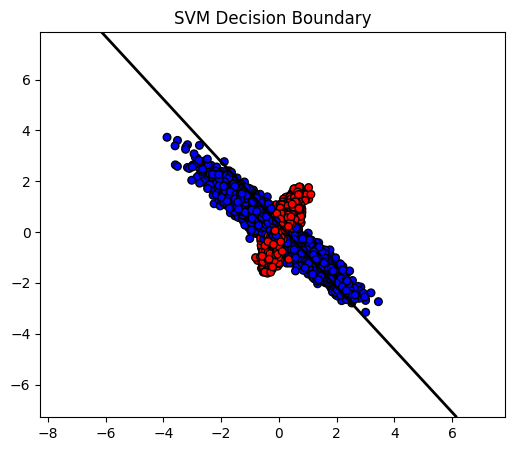

poly model
Decision function range: -4249.778758795615 4308.445763774605


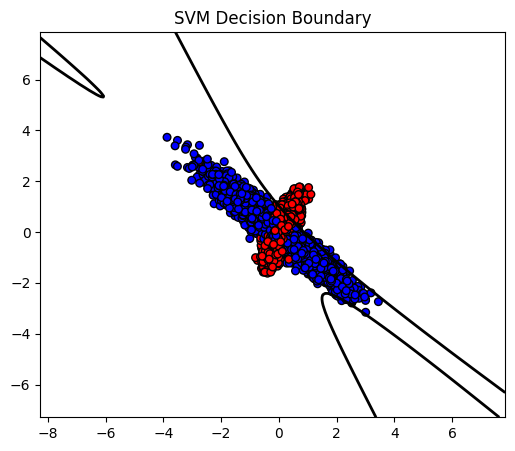

rbf model
Decision function range: -4.957985959950236 2.449542277874903


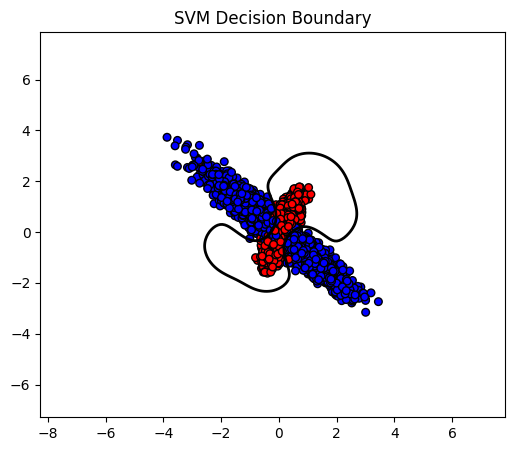

In [468]:
print("linea model")
plot_data_split_prediction(X,y,linear_model)
print("poly model")
plot_data_split_prediction(X,y,poly_model)
print('rbf model')
plot_data_split_prediction(X,y,rbf_model)

# part 5

In [469]:
from sklearn.datasets import  load_breast_cancer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [470]:
data=load_breast_cancer()
X=data.data[:,4:6]
y=data.target

## set different C for each model and train a model for each C 

In [471]:
C=[0.01,0.1,1,5,10,1000]

## this model train many models and return them in the dictionary with each C parameter that we pass is create a modle and compute the accuracy of that model and print it and show the boundary of model for predict the class for samples

## and finally it show a heapmap for each sample predict value and real value

In [472]:
def train_model_with_C_kernel(X, y, kernel, C):
    res = {}
    for c in C:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )

        if kernel == 'poly':
            model = SVC(kernel=kernel, degree=3, C=c)
        else:
            model = SVC(kernel=kernel, C=c)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train=model.predict(X_train)
        accuracy = accuracy_score(y_pred, y_test)
        accuracy_train=accuracy_score(y_pred_train,y_train)

        print(f"{kernel} model with C: {c} accuracy on Train {accuracy_train}")
        print(f"{kernel} model with C: {c} accuracy on Test: {accuracy}")
        disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
        disp.plot()
        plt.show() 

        res[f'{kernel}-{c}'] = model

    return res


linear model with C: 0.01 accuracy on Train 0.6256281407035176
linear model with C: 0.01 accuracy on Test: 0.631578947368421


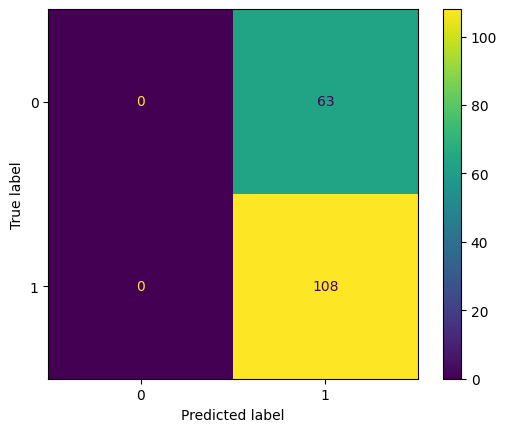

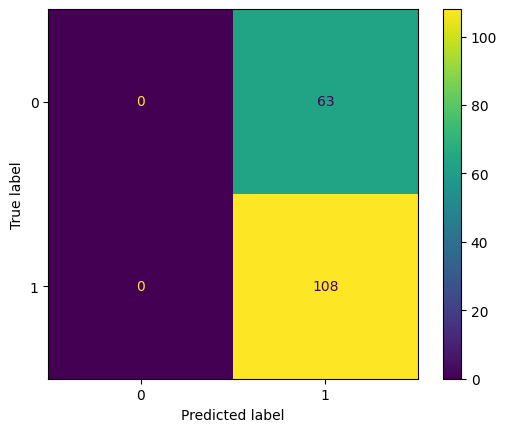

linear model with C: 0.1 accuracy on Train 0.6256281407035176
linear model with C: 0.1 accuracy on Test: 0.631578947368421


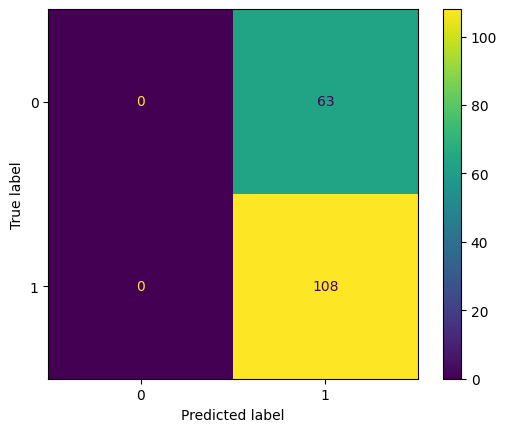

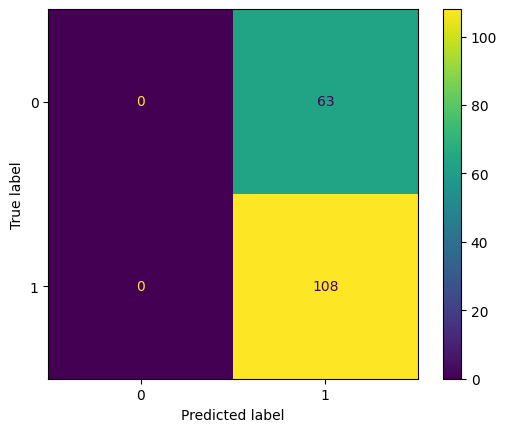

linear model with C: 1 accuracy on Train 0.6482412060301508
linear model with C: 1 accuracy on Test: 0.6783625730994152


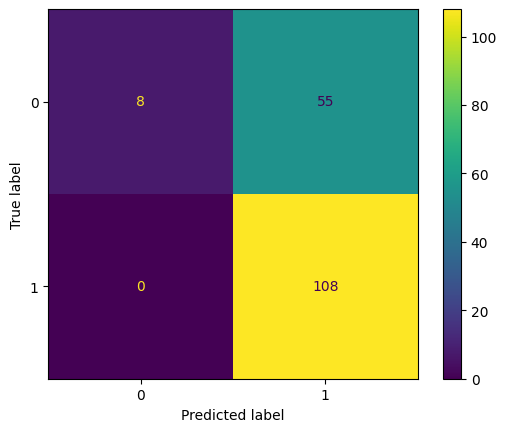

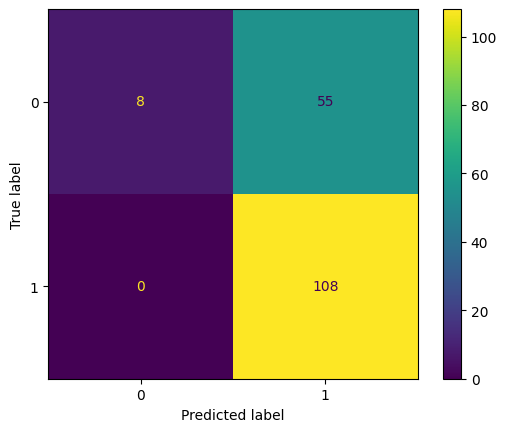

linear model with C: 5 accuracy on Train 0.7688442211055276
linear model with C: 5 accuracy on Test: 0.7777777777777778


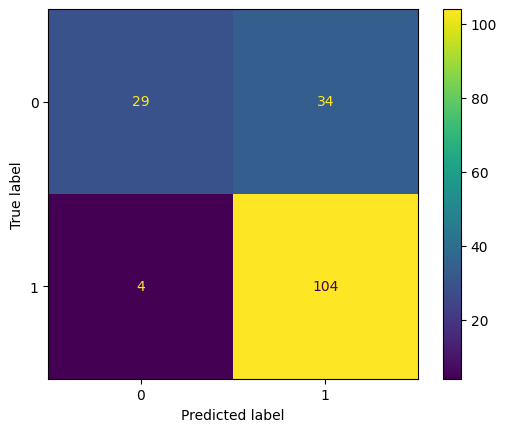

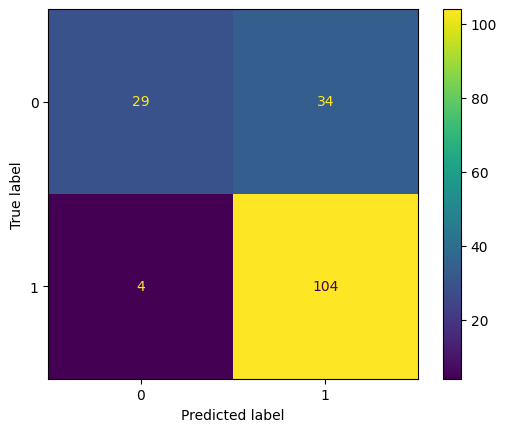

linear model with C: 10 accuracy on Train 0.7814070351758794
linear model with C: 10 accuracy on Test: 0.7719298245614035


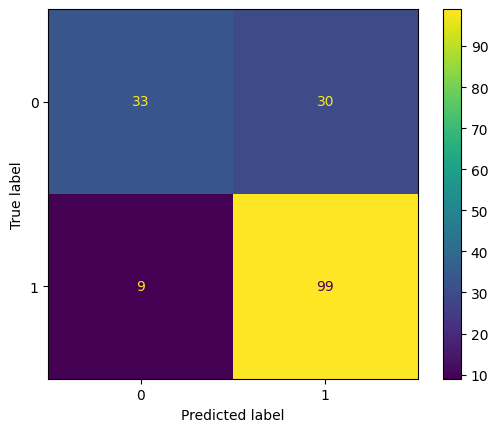

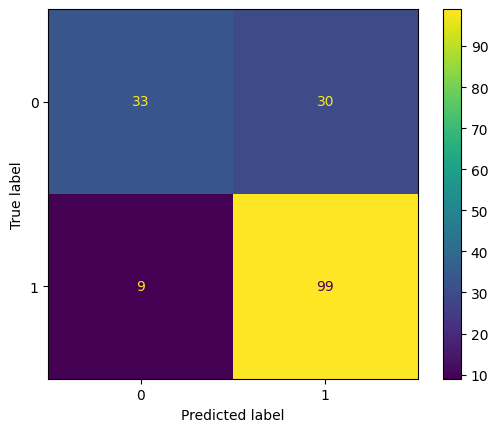

linear model with C: 1000 accuracy on Train 0.7889447236180904
linear model with C: 1000 accuracy on Test: 0.8304093567251462


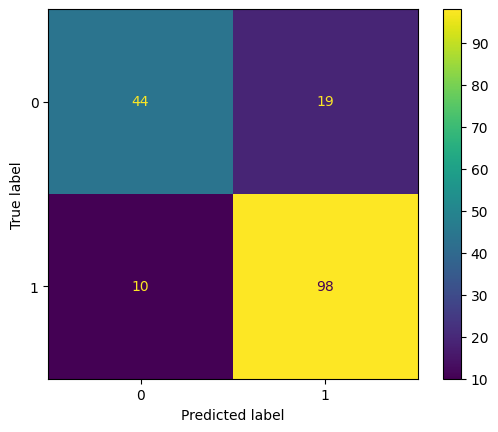

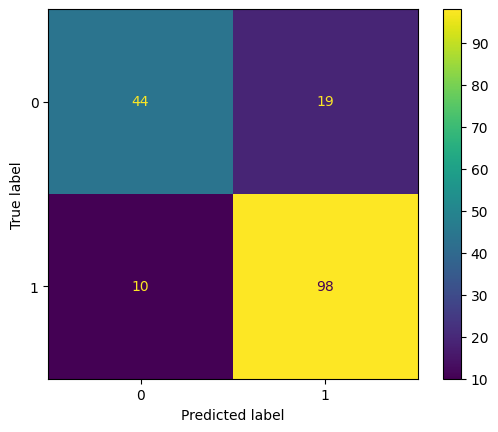

In [473]:
models=train_model_with_C_kernel(X,y,kernel='linear',C=C)

Plotting for model: linear-0.01
Decision function range: 0.9690306708886212 1.015635115333421


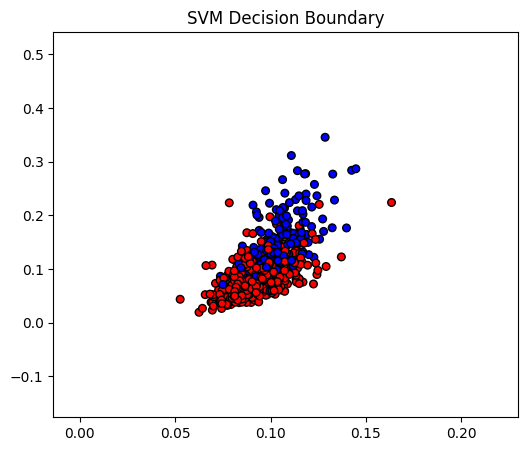

Plotting for model: linear-0.1
Decision function range: 0.6969073551802054 1.157553843262206


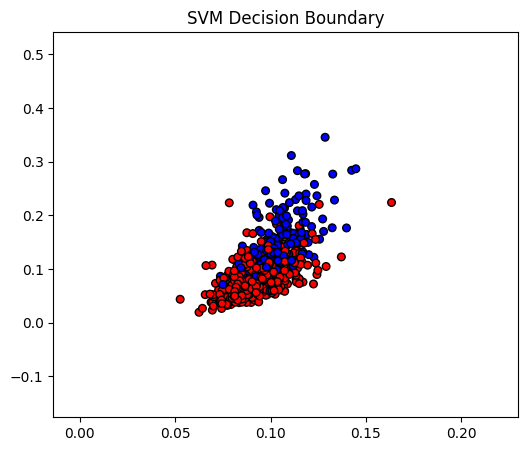

Plotting for model: linear-1
Decision function range: -2.0309264481979548 2.5755384326220514


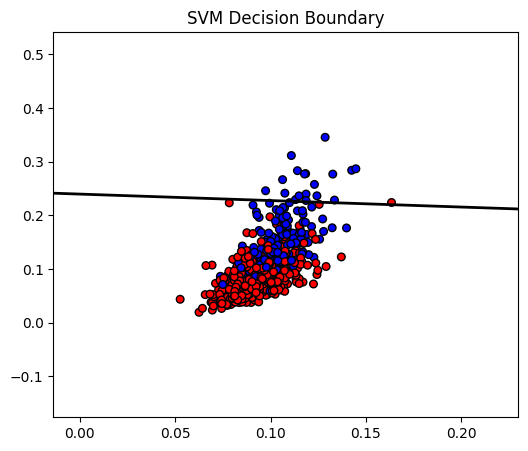

Plotting for model: linear-5
Decision function range: -6.507536911891332 5.0727650969954805


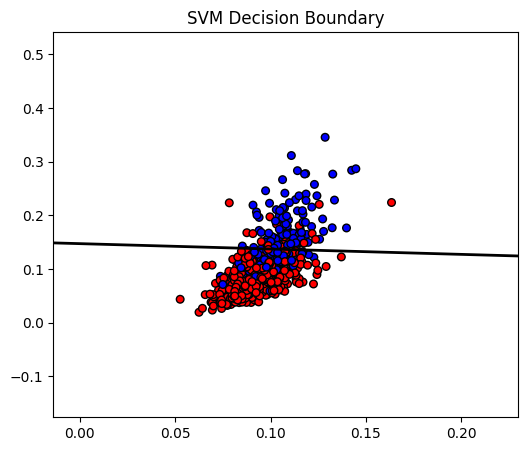

Plotting for model: linear-10
Decision function range: -7.778537135571495 5.830426208620683


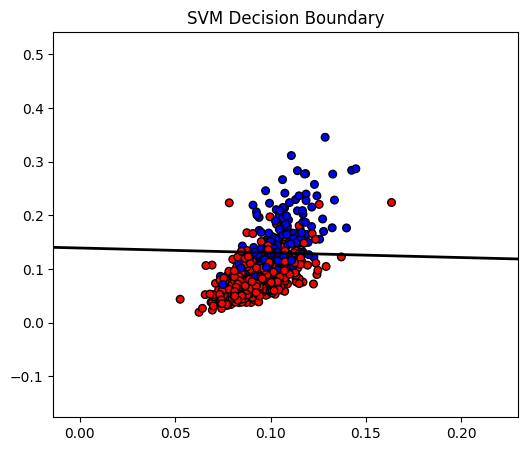

Plotting for model: linear-1000
Decision function range: -13.182983436380152 9.662266928655335


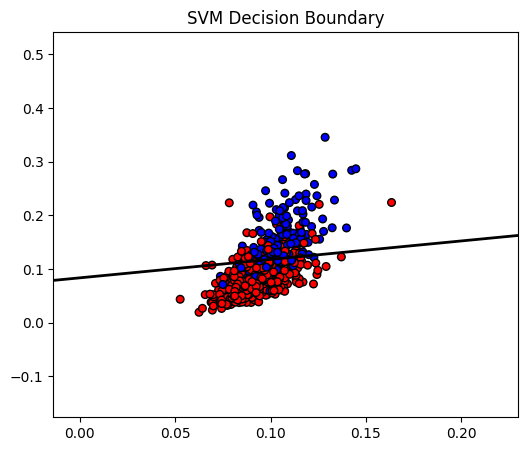

In [474]:
for name in models.keys():
    print(f"Plotting for model: {name}")
    plot_data_split_prediction(X, y, model=models[name])


# part 6

In [480]:
from sklearn.datasets import load_wine

In [481]:
data=load_wine()
X=data.data[:,:2]
y=data.target

## train 3 model on new data about wine with different kernel

In [482]:

linear_model=train_model_with_kernel(X,y,'linear')
poly_model=train_model_with_kernel(X,y,'poly')
rbf_model=train_model_with_kernel(X,y,'rbf')


linear model accuracy on Test: 0.7407407407407407
poly model accuracy on Test: 0.7592592592592593
rbf model accuracy on Test: 0.7777777777777778


## this function get the model and x and y and return the boundary that the svm model has been configured for each class

In [483]:
def plot_data_split_prediction_multy_class(X, y, model, margin=0.5, cmap='coolwarm'):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=30, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Expand limits by margin
    x_range = xlim[1] - xlim[0]
    y_range = ylim[1] - ylim[0]
    ax.set_xlim(xlim[0] - margin * x_range, xlim[1] + margin * x_range)
    ax.set_ylim(ylim[0] - margin * y_range, ylim[1] + margin * y_range)

    # Update limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Predict class for each point in grid
    Z = model.predict(xy).reshape(XX.shape)

    # Plot the background color regions
    plt.contourf(XX, YY, Z, alpha=0.3, cmap=cmap)

    plt.title("SVM Decision Regions")
    plt.colorbar(scatter, ticks=np.unique(y))
    plt.show()

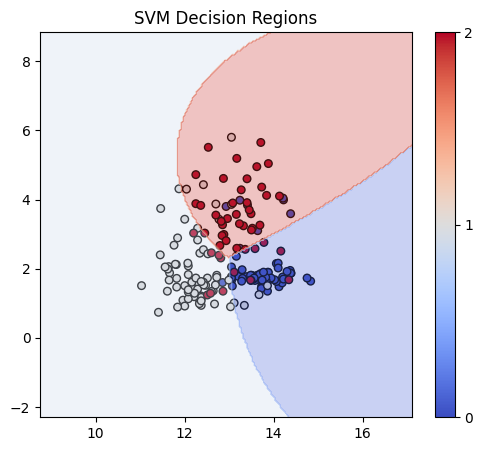

In [ ]:
plot_data_split_prediction_multy_class(X,y,linear_model)

## train a model with correct C and rbf kernel that has good accuracy on this data

In [507]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
kernel='rbf'
model=SVC(kernel=kernel,C=15)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
accuracy=accuracy_score(y_pred,y_test)
accuracy_train=accuracy_score(y_pred_train,y_train)
print(f"{kernel} model accuracy on Test: {accuracy}")
print(f"{kernel} model accuracy on Train: {accuracy_train}")


rbf model accuracy on Test: 0.7777777777777778
rbf model accuracy on Train: 0.8145161290322581


## plot the data and svm prediction class

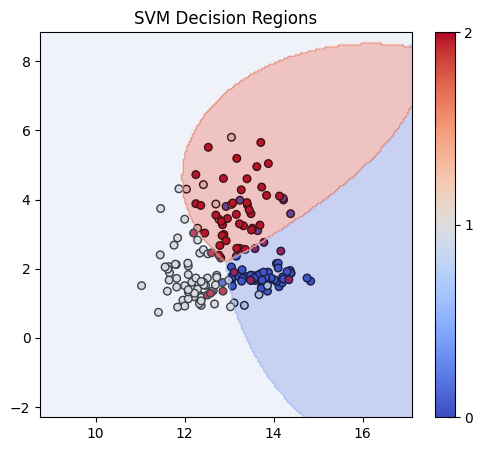

In [508]:
plot_data_split_prediction_multy_class(X,y,model)

## this heatmap show how each class is separatable from each others 

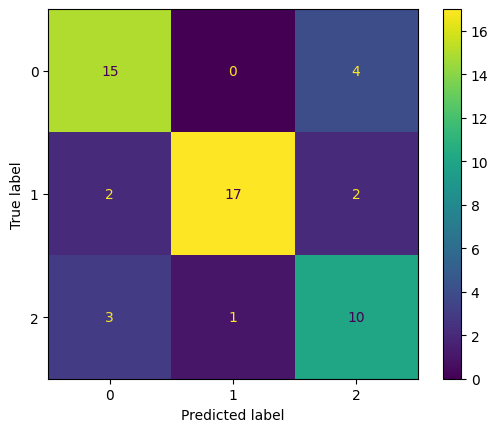

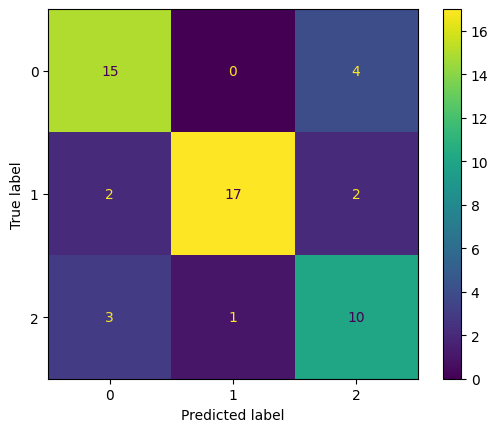

In [509]:
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
disp.plot()
plt.show() 